In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib import animation
from matplotlib import rc
import matplotlib.ticker as ticker
import matplotlib
matplotlib.font_manager._rebuild()
pd.set_option('display.max_rows', 1000)
%matplotlib inline

data = pd.read_csv('covid.csv')
data.head(10)

#### CLEANING
df = data
df = df[['date','areaName','cumCasesByPublishDateRate','cumDeathsByPublishDateRate','newCasesByPublishDateRollingRate']]
df = df.rename(columns={
    'cumCasesByPublishDateRate' : 'cumCases',
    'cumDeathsByPublishDateRate' : 'death_rate',
    'newCasesByPublishDateRollingRate' : 'new_cases_rate'
}) 
df['date'] = pd.to_datetime(df.date,format='%d/%m/%Y')
df= df[df['date'] >= '2020-10-01'].reset_index(drop=True)

df['areaName'] = df['areaName'].astype(str)

display(df.head())

####VISUALISATION
x = df['date']
y = df['new_cases_rate']
regions = df.areaName.unique().tolist()
nov_lock_date = pd.to_datetime('2020-11-05')

fig1 = plt.figure(figsize=(8,6))
axes1 = fig1.add_axes([0.1,0.1,0.9,0.9])

for region in regions:
    plt.plot(
        
        df[df['areaName']==region]['date'], 
        df[df['areaName']==region]['new_cases_rate'], 
        label = region,
        linewidth=4
    )

axes1.set_ylabel('New Cases per capita', color='#778888')

handles,labels = axes1.get_legend_handles_labels()

handles = [handles[6], handles[5], handles[7], handles[3], handles[4], handles[0], handles[1], handles[2], handles[8]]

labels = [labels[6], labels[5], labels[7], labels[3], labels[4], labels[0], labels[1], labels[2], labels[8]]

lgd = axes1.legend(handles= handles,
             labels=labels,
             loc='upper left', 
             bbox_to_anchor=(1,0.9), 
             labelcolor='linecolor',
             fontsize=(14),
             frameon=False
            )

myFmt = mdates.DateFormatter('%b %d')
axes1.xaxis.set_major_formatter(myFmt)

axes1.set_xlim(pd.to_datetime('2020-10-28'),pd.to_datetime('2020-12-18'))
plt.xticks(rotation=45, ha='right')

sns.set_context('poster', font_scale=0.8)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.axvline(x=nov_lock_date, ymin=0.1, ymax=0.95,color='#3fd62b')

axes1.annotate('November Lockdown',
              xy=(pd.to_datetime('2020-11-06'),500),
               xytext=(pd.to_datetime('2020-11-22'),490),
               arrowprops=dict(shrink=0.01,color='#3fd62b'),
               color='#778888'
              )

axes1.xaxis.set_major_locator(ticker.MultipleLocator(4.9))
fig1.set_facecolor('#05303b')
axes1.set_facecolor('#073642')
axes1.tick_params(axis='x',colors='#4a666e')
axes1.tick_params(axis='y',colors='#4a666e')
plt.grid(True, color='#002d38')

fig1.savefig('newcasesrate.jpeg', bbox_extra_artists=(lgd,), bbox_inches='tight')

#df.head()

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import matplotlib.dates as mdates
from matplotlib import animation
from matplotlib import rc
import matplotlib.ticker as ticker
import matplotlib
matplotlib.font_manager._rebuild()
pd.set_option('display.max_rows', 1000)
%matplotlib inline

data = pd.read_csv('covid.csv')
data.head(10)

,date,areaType,areaCode,areaName,cumCasesByPublishDateRate,cumDeathsByPublishDateRate,newCasesByPublishDateRollingRate
0,18/12/2020,region,E12000001,North East,4142.3,170.9,158.0
1,17/12/2020,region,E12000001,North East,NaN,170.0,164.5
2,16/12/2020,region,E12000001,North East,NaN,169.1,172.0
3,15/12/2020,region,E12000001,North East,NaN,167.4,167.8
4,14/12/2020,region,E12000001,North East,NaN,166.3,165.7
5,13/12/2020,region,E12000001,North East,NaN,166.0,164.1
6,12/12/2020,region,E12000001,North East,NaN,165.5,163.0
7,11/12/2020,region,E12000001,North East,NaN,164.6,156.1
8,10/12/2020,region,E12000001,North East,NaN,163.7,156.4
9,09/12/2020,region,E12000001,North East,NaN,162.3,151.2


In [138]:
df = data
df = df[['date','areaName','cumCasesByPublishDateRate','cumDeathsByPublishDateRate','newCasesByPublishDateRollingRate']]
df = df.rename(columns={
    'cumCasesByPublishDateRate' : 'cumCases',
    'cumDeathsByPublishDateRate' : 'death_rate',
    'newCasesByPublishDateRollingRate' : 'new_cases_rate'
}) 
df['date'] = pd.to_datetime(df.date,format='%d/%m/%Y')
df= df[df['date'] >= '2020-10-01'].reset_index(drop=True)

df['areaName'] = df['areaName'].astype(str)


display(df.head())

,date,areaName,cumCases,death_rate,new_cases_rate
0,2020-12-18,North East,4142.3,170.9,158.0
1,2020-12-17,North East,NaN,170.0,164.5
2,2020-12-16,North East,NaN,169.1,172.0
3,2020-12-15,North East,NaN,167.4,167.8
4,2020-12-14,North East,NaN,166.3,165.7


In [139]:
handles,labels = axes1.get_legend_handles_labels()
last_df = df[df.date == '2020-12-18'].reset_index(drop=True).sort_values(by='new_cases_rate',ascending=False)
last_df

,date,areaName,cumCases,death_rate,new_cases_rate
6,2020-12-18,London,2574.4,101.0,423.2
5,2020-12-18,East of England,1978.0,107.1,332.9
7,2020-12-18,South East,2056.6,93.5,305.2
3,2020-12-18,East Midlands,3318.9,132.6,199.8
4,2020-12-18,West Midlands,3245.4,147.7,193.8
0,2020-12-18,North East,4142.3,170.9,158.0
1,2020-12-18,North West,4544.4,183.4,156.4
2,2020-12-18,Yorkshire and The Humber,4265.3,151.5,148.5
8,2020-12-18,South West,1657.8,65.4,118.4


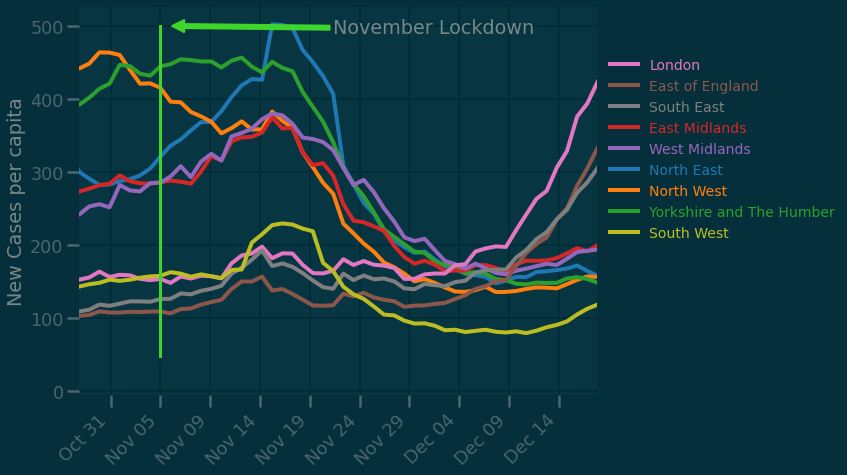

In [219]:
x = df['date']
y = df['new_cases_rate']
regions = df.areaName.unique().tolist()
nov_lock_date = pd.to_datetime('2020-11-05')

fig1 = plt.figure(figsize=(8,6))
axes1 = fig1.add_axes([0.1,0.1,0.9,0.9])

for region in regions:
    plt.plot(
        
        df[df['areaName']==region]['date'], 
        df[df['areaName']==region]['new_cases_rate'], 
        label = region,
        linewidth=4
    )

axes1.set_ylabel('New Cases per capita', color='#778888')

handles,labels = axes1.get_legend_handles_labels()

handles = [handles[6], handles[5], handles[7], handles[3], handles[4], handles[0], handles[1], handles[2], handles[8]]

labels = [labels[6], labels[5], labels[7], labels[3], labels[4], labels[0], labels[1], labels[2], labels[8]]

lgd = axes1.legend(handles= handles,
             labels=labels,
             loc='upper left', 
             bbox_to_anchor=(1,0.9), 
             labelcolor='linecolor',
             fontsize=(14),
             frameon=False
            )

myFmt = mdates.DateFormatter('%b %d')
axes1.xaxis.set_major_formatter(myFmt)

axes1.set_xlim(pd.to_datetime('2020-10-28'),pd.to_datetime('2020-12-18'))
plt.xticks(rotation=45, ha='right')

sns.set_context('poster', font_scale=0.8)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.axvline(x=nov_lock_date, ymin=0.1, ymax=0.95,color='#3fd62b')

axes1.annotate('November Lockdown',
              xy=(pd.to_datetime('2020-11-06'),500),
               xytext=(pd.to_datetime('2020-11-22'),490),
               arrowprops=dict(shrink=0.01,color='#3fd62b'),
               color='#778888'
              )

axes1.xaxis.set_major_locator(ticker.MultipleLocator(4.9))
fig1.set_facecolor('#05303b')
axes1.set_facecolor('#073642')
axes1.tick_params(axis='x',colors='#4a666e')
axes1.tick_params(axis='y',colors='#4a666e')
plt.grid(True, color='#002d38')

fig1.savefig('newcasesrate.jpeg', bbox_extra_artists=(lgd,), bbox_inches='tight')

#df.head()

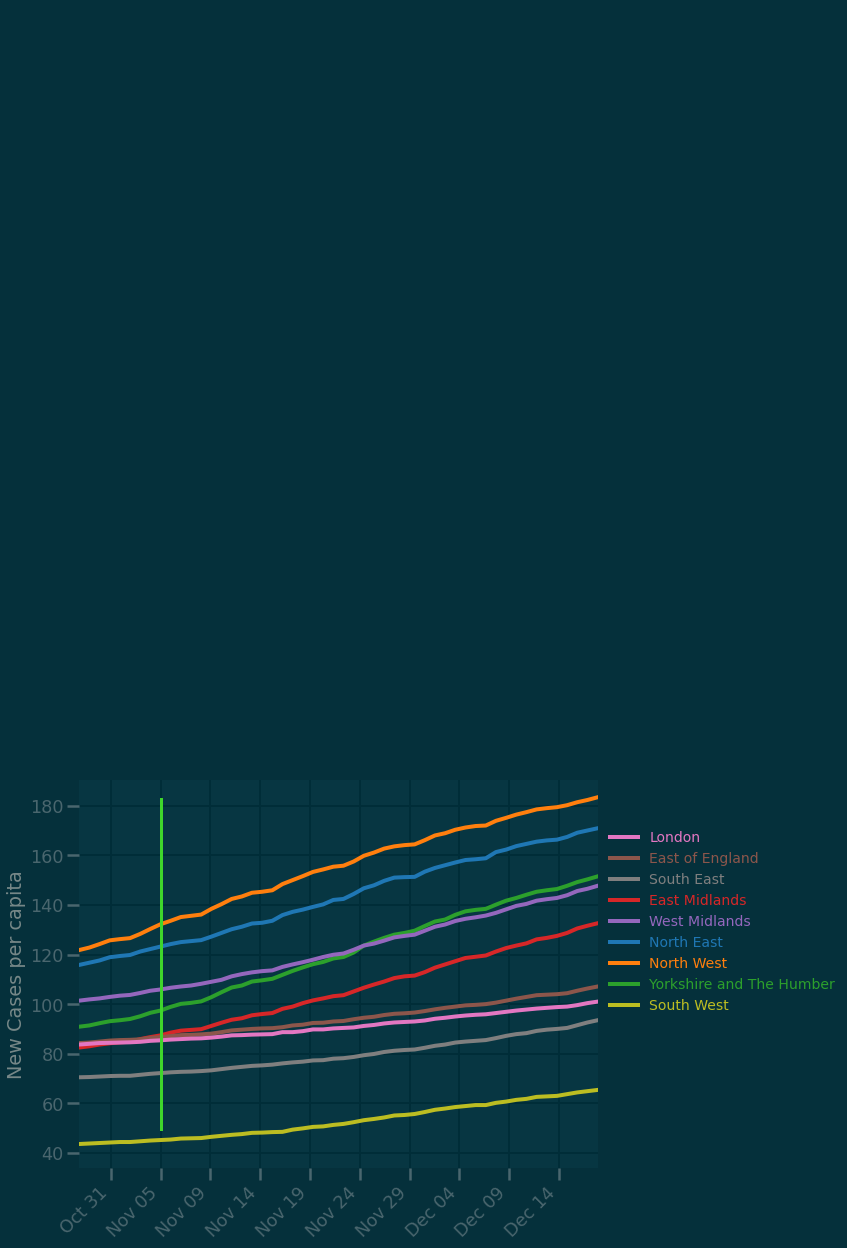

In [220]:
x = df['date']
y = df['death_rate']
regions = df.areaName.unique().tolist()
nov_lock_date = pd.to_datetime('2020-11-05')

fig1 = plt.figure(figsize=(8,6))
axes1 = fig1.add_axes([0.1,0.1,0.9,0.9])

for region in regions:
    plt.plot(
        
        df[df['areaName']==region]['date'], 
        df[df['areaName']==region]['death_rate'], 
        label = region,
        linewidth=4
    )

axes1.set_ylabel('New Cases per capita', color='#778888')

handles,labels = axes1.get_legend_handles_labels()

handles = [handles[6], handles[5], handles[7], handles[3], handles[4], handles[0], handles[1], handles[2], handles[8]]

labels = [labels[6], labels[5], labels[7], labels[3], labels[4], labels[0], labels[1], labels[2], labels[8]]

lgd = axes1.legend(handles= handles,
             labels=labels,
             loc='upper left', 
             bbox_to_anchor=(1,0.9), 
             labelcolor='linecolor',
             fontsize=(14),
             frameon=False
            )

myFmt = mdates.DateFormatter('%b %d')
axes1.xaxis.set_major_formatter(myFmt)

axes1.set_xlim(pd.to_datetime('2020-10-28'),pd.to_datetime('2020-12-18'))
plt.xticks(rotation=45, ha='right')

sns.set_context('poster', font_scale=0.8)
sns.despine(top=True, right=True, left=True, bottom=True)

plt.axvline(x=nov_lock_date, ymin=0.1, ymax=0.95,color='#3fd62b')

axes1.annotate('November Lockdown',
              xy=(pd.to_datetime('2020-11-06'),500),
               xytext=(pd.to_datetime('2020-11-22'),490),
               arrowprops=dict(shrink=0.01,color='#3fd62b'),
               color='#778888'
              )

axes1.xaxis.set_major_locator(ticker.MultipleLocator(4.9))
fig1.set_facecolor('#05303b')
axes1.set_facecolor('#073642')
axes1.tick_params(axis='x',colors='#4a666e')
axes1.tick_params(axis='y',colors='#4a666e')
plt.grid(True, color='#002d38')

#plt.title('Source:\ncoronavirus.data.gov.uk', y=-0.18, x=1.1, color='#778888')

#fig1.savefig('newcasesrate.jpeg', bbox_extra_artists=(lgd,), bbox_inches='tight')

#df.head()